In [ ]:
##############################################################################################
##############################################################################################
# ORIGINAL CODE: http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_label.html #
##############################################################################################
##############################################################################################

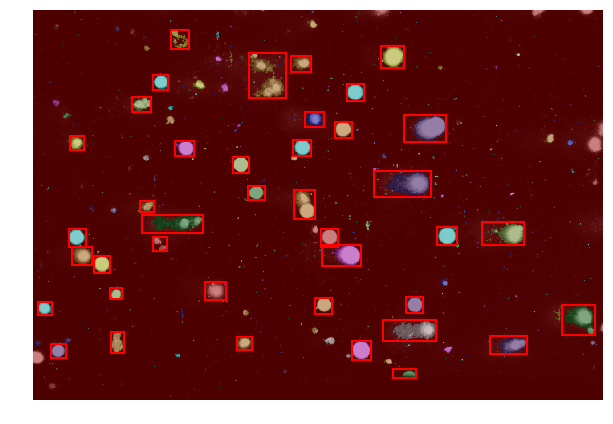

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu

from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
import scipy
from scipy import misc

import cv2 
image = cv2.imread('images/slide2.bmp',0)

# apply threshold
from skimage.filters import threshold_li
thresh = threshold_li(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

i = 0
for region in regionprops(label_image):
    i = i+1
    
    # take regions with large enough areas
    if region.area >= 400:
        if(region.bbox[2] - region.bbox[0] + 10 < region.bbox[3] - region.bbox[1]):
            # draw rectangle around segmented coins
            minr, minc, maxr, maxc = region.bbox
            minc = minc - 20
            
            rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)
            scipy.misc.imsave("segmentation/"+str(i)+".bmp", image[minr:maxr, minc:maxc])
        else:
            # draw rectangle around segmented coins
            minr, minc, maxr, maxc = region.bbox
            rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)
            scipy.misc.imsave("segmentation/"+str(i)+".bmp", image[minr:maxr, minc:maxc])

ax.set_axis_off()
plt.tight_layout()
plt.show()

